This notebook can be used to generate the main graphs in our paper on mechanotransduction signaling in cells on nanopillars.

First, we introduce the necessary imports and configure our matplotlib settings.

In [ ]:
import sys, os, pathlib
sys.path.append("/root/shared/gitrepos/smart-nanopillars/utils")
sys.path.append("/root/shared/gitrepos/smart-comp-sci/mechanotransduction-example")
cur_dir = str(pathlib.Path.cwd() / "..")
import smart_analysis
from matplotlib import pyplot as plt
import matplotlib
plt.style.use(f"{cur_dir}/utils/smart_plots.mplstyle")
matplotlib.rcParams.update({'figure.figsize': (5,3)})
import numpy as np

This runs data analysis on all simulations in all subfolders within the folder specified by `files_dir` and saves into `npy_dir`. The correct mesh must be included in a subfolder of `mesh_dir`.

In [ ]:
import re
mesh_dir = "/root/shared/gitrepos/smart-nanopillars/meshes/nanopillars_indent"
files_dir = "/root/scratch/results_nanopillars_indentation_poreTesting_noPhosNewRatio_altDiffusionREDO"
npy_dir = pathlib.Path.cwd() / ".." / "analysis_data" / "npy-files-nanopillars-rupture-newdiff"
npy_dir.mkdir(exist_ok=True)
test_folders = os.listdir(files_dir)
condition_str = []
for i in range(0,len(test_folders)):
    mesh_file = ""
    for folder in os.listdir(mesh_dir):
        if folder in test_folders[i]: # mesh name matches current case
            mesh_file = f"{mesh_dir}/{folder}/spreadCell_mesh.h5"
            break
    if mesh_file == "":
        Warning("Mesh could not be found, skipping to next case")
        condition_str.append("")
        continue
    results_folder = f"{files_dir}/{test_folders[i]}"
    condition_cur = test_folders[i]
    condition_str.append(condition_cur)
    if mesh_file=="" or results_folder=="":
        ValueError("Folders do not match expected structure for analysis")
    height = 3.0
    zmax_nuc = 6.4
    if "loc" in test_folders[i]:
        loc = float(re.findall(r"loc.*?_", test_folders[i])[0][3:-1])
    else:
        loc = 0
    tests = ["all"]#,"center_low","center_high"] # other spatial domains could be specified here
    center_low = [loc-1, -1, 0, loc+1, 1, height+1]
    center_high = [loc-1, -1, zmax_nuc-1.0, loc+1, 1, zmax_nuc+10]
    domains = [[], center_low, center_high]
    for sd in range(len(tests)):
        try:
            tVec, results_all = smart_analysis.analyze_all(
                mesh_file=mesh_file, results_path=results_folder, display=False, axisymm=False,
                subdomain=domains[sd])
        except:
            Warning("error in analysis, skipping to next case")
            continue
        results_all.insert(0, tVec) # add time as first element in list
        max_length = len(tVec)
        for j in range(len(results_all)):
            if len(results_all[j]) > max_length:
                max_length = len(results_all[j])
        for j in range(len(results_all)):
            num_zeros = max_length - len(results_all[j])
            for k in range(num_zeros):
                results_all[j].append(0)
        np.save(npy_dir / f"{condition_cur}_results_{tests[sd]}.npy", results_all)

In [ ]:
radiusArray= np.array([
 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
 0.5, 0.25, 0.5, 0.25,
 100.0, 100.0, 100.0, 100.0, 100.0])
pitchArray= np.array([
 5.0, 2.5, 1.0, 5.0, 2.5, 1.0,
 5.0, 2.5, 5.0, 2.5,
 100.0, 100.0, 100.0, 100.0, 100.0])
heightArray= np.array([
 1.0, 1.0, 1.0, 3.0, 3.0, 3.0,
 1.0, 1.0, 3.0, 3.0,
 0.0, 0.0, 0.0, 0.0, 0.0])
cellRadArray= np.array([
 20.25, 18.52, 16.55, 19.93, 18.04, 15.39,
 20.01, 17.45, 18.06, 17.64,
 22.48, 18.08, 15.39, 14.18, 12.33])
Aspread= np.pi*cellRadArray**2 * (1 + 2*np.pi*radiusArray*heightArray/pitchArray**2)
Astim = np.pi*cellRadArray**2 * (1 + 2*np.pi*radiusArray*heightArray*np.exp(-1/(2*radiusArray*5))/pitchArray**2)
Atot = Aspread + np.pi*cellRadArray**2 * 1.5 + 2*np.pi*cellRadArray*heightArray
plt.bar(np.arange(len(Astim)), Atot)

Generate graphs of YAP/TAZ N/C over time for cells on different nanopillar substrates (Fig 2D) and store relevant steady-state concentrations.

In [ ]:
from smart import mesh_tools
import dolfin as d
radiusArray= [
 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
 0.5, 0.25, 0.5, 0.25,
 0.0, 0.0, 0.0, 0.0, 0.0]
pitchArray= [
 5.0, 2.5, 1.0, 5.0, 2.5, 1.0,
 5.0, 2.5, 5.0, 2.5,
 0.0, 0.0, 0.0, 0.0, 0.0]
heightArray=[
 1.0, 1.0, 1.0, 3.0, 3.0, 3.0,
 1.0, 1.0, 3.0, 3.0,
 0.0, 0.0, 0.0, 0.0, 0.0]
cellRadArray=[
 20.25, 18.52, 16.55, 19.93, 18.04, 15.39,
 20.01, 17.45, 18.06, 17.64,
 22.48, 18.08, 15.39, 14.18, 12.33]
EModArray=[
 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 
 10000000, 10000000, 10000000, 10000000,
 10000000, 14, 7, 3, 1]
tests_idx = [1,7,10]
yapData = [
 2.697152, 2.223328, 2.084372, 2.669816, 2.360008, 2.079816,
 2.55696, 2.264736, 2.456508, 2.365188,
 3.320408, 2.285056, 1.806156, 1.555306, 1.43672
]
yapSEMData = [
    0.100232, 0.063784, 0.054732, 0.09112, 0.072896, 0.054732,
    0.073056, 0.036528, 0.063924, 0.063924,
    0.04561, 0.04561, 0.036488, 0.031922, 0.041044
]
NVals = [
    38, 89, 59, 59, 69, 60,
    48, 58, 58, 58,
    396, 134, 164, 86, 23
]
yapStdData = np.array(yapSEMData) * np.sqrt(np.array(NVals))
curv0Array=[0, 1, 2, 5, 10]
var_names_saved = ["Cofilin_NP", "FActin", "GActin", "LaminA", "LIMK_A", "mDia_A", 
                   "Myo_A", "NPC_A", "pFAK", "RhoA_GDP", "RhoA_GTP", "ROCK_A", "Substrate_A", 
                   "YAPTAZ", "YAPTAZ_nuc", "YAPTAZ_phos"]
plot_names = ["YAPTAZ_phos", "YAPTAZ", "YAPTAZ_nuc"]
results_idx = []
for name in plot_names:
    results_idx.append(var_names_saved.index(name) + 1) # add one because time is first el
pFAK_idx = var_names_saved.index("pFAK") + 1
RhoA_idx = var_names_saved.index("RhoA_GTP") + 1
FActin_idx = var_names_saved.index("FActin") + 1
Myo_idx = var_names_saved.index("Myo_A") + 1
mesh_dir = f"{cur_dir}/meshes/nanopillars_baseline"

errors_list = []
wasp_vals = [0.001, 0.01]

for wasp_val in wasp_vals:
    YAPTAZ_ratios = np.zeros([len(cellRadArray), len(curv0Array)])
    pFAK_SS = np.zeros([len(cellRadArray), len(curv0Array)])
    RhoA_GTP_SS = np.zeros([len(cellRadArray), len(curv0Array)])
    FActin_SS = np.zeros([len(cellRadArray), len(curv0Array)])
    MyoA_SS = np.zeros([len(cellRadArray), len(curv0Array)])
    errors = np.zeros([len(cellRadArray), len(curv0Array)])
    for i in [0, 1, 2, 6, 7, 10, 11, 12, 13, 14]:
        loaded_cur = mesh_tools.load_mesh(pathlib.Path(
            f"{mesh_dir}/nanopillars_h{heightArray[i]}_p{pitchArray[i]}_r{radiusArray[i]}_" 
            f"cellRad{cellRadArray[i]}") / "spreadCell_mesh.h5")
        PM_area = d.assemble(1.0*d.Measure("dx", d.create_meshview(loaded_cur.mf_facet, 10)))
        cyto_vol = d.assemble(1.0*d.Measure("dx", d.create_meshview(loaded_cur.mf_cell, 1)))
        if i >= 10:
            file_cur = (f"{cur_dir}/analysis_data/npy-files-nanopillars-newdiff/"
                    f"nanopillars_h{heightArray[i]}_p{pitchArray[i]}_r{radiusArray[i]}_" 
                    f"cellRad{cellRadArray[i]}_wasp{wasp_val}_results_all.npy")
            results_cur = np.load(file_cur)
            YAPphos = results_cur[results_idx[0]]
            YAPnp = results_cur[results_idx[1]]
            YAPnuc = results_cur[results_idx[2]]
            YAPratio = YAPnuc / (YAPphos + YAPnp)
            YAPTAZ_ratios[i][:] = YAPratio[-1]
            pFAK = results_cur[pFAK_idx]
            RhoA_GTP = results_cur[RhoA_idx]
            RhoA_GTP *= PM_area
            FActin = results_cur[FActin_idx]
            MyoA = results_cur[Myo_idx]
            pFAK_SS[i][:] = pFAK[-1]
            RhoA_GTP_SS[i][:] = RhoA_GTP[-1]
            FActin_SS[i][:] = FActin[-1]
            MyoA_SS[i][:] = MyoA[-1]
            if i == 10 and np.isclose(wasp_val, 0.01):
                plt.plot(results_cur[0], YAPratio,
                        label=f"h{heightArray[i]}_p{pitchArray[i]}_r{radiusArray[i]}_cellRad{cellRadArray[i]}")
        else:
            for j in range(len(curv0Array)):
                file_cur = (f"{cur_dir}/analysis_data/npy-files-nanopillars-newdiff/" 
                        f"nanopillars_h{heightArray[i]}_p{pitchArray[i]}_r{radiusArray[i]}_" 
                        f"cellRad{cellRadArray[i]}_nprate_curvSens{curv0Array[j]}_wasp{wasp_val}_results_all.npy")
                results_cur = np.load(file_cur)
                YAPphos = results_cur[results_idx[0]]
                YAPnp = results_cur[results_idx[1]]
                YAPnuc = results_cur[results_idx[2]]
                YAPratio = YAPnuc / (YAPphos + YAPnp)
                YAPTAZ_ratios[i][j] = YAPratio[-1]
                errors[i][j] = (YAPratio[-1] - yapData[i])**2 / yapSEMData[i]**2
                pFAK = results_cur[pFAK_idx]
                RhoA_GTP = results_cur[RhoA_idx]
                RhoA_GTP *= PM_area
                FActin = results_cur[FActin_idx]
                MyoA = results_cur[Myo_idx]
                pFAK_SS[i][j] = pFAK[-1] # SS FAK
                RhoA_GTP_SS[i][j] = RhoA_GTP[-1]
                FActin_SS[i][j] = FActin[-1]
                MyoA_SS[i][j] = MyoA[-1]
                if i in [0,1] and np.isclose(curv0Array[j], 5) and np.isclose(wasp_val, 0.01):
                    plt.plot(results_cur[0], YAPratio,
                        label=f"h{heightArray[i]}_p{pitchArray[i]}_r{radiusArray[i]}_cellRad{cellRadArray[i]}")
    errors_list.append(errors)

plt.legend()
plt.ylabel("YAP/TAZ N/C")
plt.xlabel('Time (s)')
plt.xlim([0, 3600])
# plt.savefig("cytosolic activation.pdf", format="pdf")

Plot YAP/TAZ N/C as a function of nanopillar density (for 100 nm nanopillar radius), as shown in Fig 6A.

In [ ]:
plt.plot([0, 1/5**2, 1/2.5**2, 1], YAPTAZ_ratios[[10,0,1,2],3], '-o')
plt.savefig("nanopillar_density.pdf", format="pdf")

Plot summary of cytosolic stiffness, stress fibers, and pFAK at steady state (Fig 1C-F)

In [ ]:
vars = [9e-6*FActin_SS**2.6, FActin_SS*MyoA_SS/548.444, pFAK_SS, RhoA_GTP_SS]
names = ["Cyto stiffness", "Stress fibers", "pFAK", "RhoA-GTP"]
for i in range(len(vars)):
    plt.figure()
    cur_var = vars[i]
    name = names[i]
    width = 0.75  # the width of the bars

    x = [0,1,2]
    fig, ax = plt.subplots(layout='constrained', figsize=(3,3))
    ax.bar(x, cur_var[[10,1,7],3], width)
    ax.set_ylabel(name)
    ax.set_xticks(x, ['flat','100 nm', '250 nm'])
    plt.savefig(f"{name}_bars.pdf", format="pdf")

Plot NSSE as a function of alpha0 (curvature sensitivity parameter):

In [ ]:
curvSens = [0, 1/10, 1/5, 1/2, 1]
errorsSel0 = [np.sum(errors_list[0][:,0]), np.sum(errors_list[0][:,4]), np.sum(errors_list[0][:,3]),
            np.sum(errors_list[0][:,2]), np.sum(errors_list[0][:,1])]
plt.plot(curvSens, errorsSel0, 'o-', label="kWASP=0.001")
errorsSel1 = [np.sum(errors_list[1][:,0]), np.sum(errors_list[1][:,4]), np.sum(errors_list[1][:,3]),
            np.sum(errors_list[1][:,2]), np.sum(errors_list[1][:,1])]
plt.plot(curvSens, errorsSel1, 'o--', label="kWASP=0.01")
# plt.ylim([100,300])
plt.ylabel("Normalized SSE")
plt.xlabel("Curvature sensitivity")
plt.legend()
plt.savefig("curv_sens_fit.pdf", format="pdf")

Compare simulation YAP/TAZ N/C to experimentally measured values. If `multCond` is true, then plot for different levels of curvature sensitivity (Fig S1), otherwise create graph shown in Fig 2.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
multCond = True

conditions = []
for i in [10,0, 1, 2, 7, 6]:
    conditions.append(f"h{heightArray[i]}p{pitchArray[i]}r{radiusArray[i]}")
YAPTAZ_expt = np.array(yapData)
YAPTAZ_expt_std = np.array(yapStdData)
if multCond:
    np_means = {
        'Experiments': YAPTAZ_expt[[10,0,1,2,7,6]],
        'No curv sens': YAPTAZ_ratios[[10,0,1,2,7,6],0],
        'H0=10': YAPTAZ_ratios[[10,0,1,2,7,6],4],
        'H0=5': YAPTAZ_ratios[[10,0,1,2,7,6],3],
        'H0=2': YAPTAZ_ratios[[10,0,1,2,7,6], 2],
    }
    width = 0.12  # the width of the bars
else:
    np_means = {
        'Experiments': YAPTAZ_expt[[10,0,1,2,7,6]],
        'H0=5': YAPTAZ_ratios[[10,0,1,2,7,6],3],
    }
    width = 0.3

x = np.arange(len(conditions))  # the label locations
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(6,4))

for attribute, measurement in np_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

ax.errorbar(x, YAPTAZ_expt[[10,0,1,2,7,6]], YAPTAZ_expt_std[[10,0,1,2,7,6]], linestyle='None', color="r", capsize=4)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('YAP/TAZ N/C')
ax.set_xticks(x + width/2, conditions)
ax.legend()#loc='upper right')
plt.ylim([0.0, 4.5])
plt.savefig("bargraph_multcond.pdf", format="pdf")

Create plots for different vertical positions of nucleus (Fig S2)

(0.0, 3600.0)

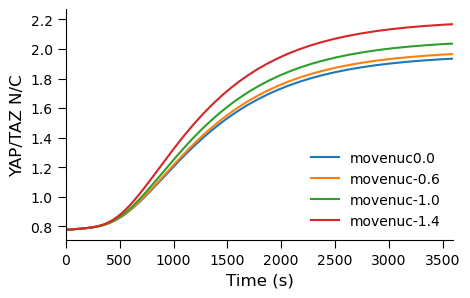

In [8]:
moveNucArray = [0.0, -0.6, -1.0, -1.4]
var_names_saved = ["Cofilin_NP", "FActin", "GActin", "LaminA", "LIMK_A", "mDia_A", 
                   "Myo_A", "NPC_A", "pFAK", "RhoA_GDP", "RhoA_GTP", "ROCK_A", 
                   "Substrate_A", "YAPTAZ", "YAPTAZ_nuc", "YAPTAZ_phos"]
plot_names = ["YAPTAZ_phos", "YAPTAZ", "YAPTAZ_nuc"]
results_idx = []
for name in plot_names:
    results_idx.append(var_names_saved.index(name) + 1) # add one because time is first el
fig, ax = plt.subplots()

YAPTAZ_ratios = np.zeros([len(moveNucArray), 1])

for i in range(len(moveNucArray)):
    file_cur = (f"{cur_dir}/analysis_data/npy-files-nanopillars-movenuc-newdiff"
                    f"/nanopillars_movenuc{moveNucArray[i]}_REDO_results_all.npy")
    try:
        results_cur = np.load(file_cur)
    except:
        continue
    YAPphos = results_cur[results_idx[0]]
    YAPnp = results_cur[results_idx[1]]
    YAPnuc = results_cur[results_idx[2]]
    YAPratio = YAPnuc / (YAPphos + YAPnp)
    YAPTAZ_ratios[i] = YAPratio[-1]
    plt.plot(results_cur[0], YAPratio,
        label=f"movenuc{moveNucArray[i]}")
plt.ylabel("YAP/TAZ N/C")
plt.xlabel('Time (s)')
plt.legend()
plt.xlim([0, 3600])
# plt.ylim([2.9, 3.2])
# plt.savefig("YAPTAZ_movenuc.pdf", format="pdf")

Plot NPC import rate as a function of stretch for different stretch sensitivites (Fig 4E).

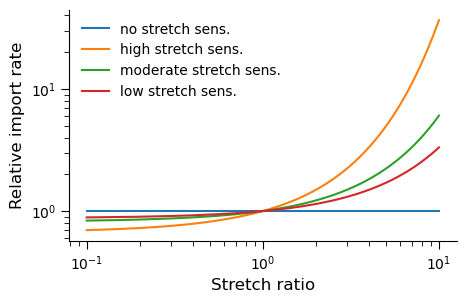

In [9]:
stretch_vals = np.linspace(0.1, 10, 200)
plt.loglog(stretch_vals, np.ones_like(stretch_vals),label='no stretch sens.')
plt.loglog(stretch_vals, np.exp((stretch_vals-1)/2.5),label='high stretch sens.')
plt.loglog(stretch_vals, np.exp((stretch_vals-1)/5.0), label='moderate stretch sens.')
plt.loglog(stretch_vals, np.exp((stretch_vals-1)/7.5), label='low stretch sens.')

plt.xlabel('Stretch ratio')
plt.ylabel('Relative import rate')
plt.legend()
# plt.savefig("/root/shared/gitrepos/smart-comp-sci-data/pyplots/nanopillars/stretch_transport.pdf", format="pdf")

Plot YAP/TAZ N/C for different stretch sensitivities, store SS YAP/TAZ N/C.

(0.0, 3600.0)

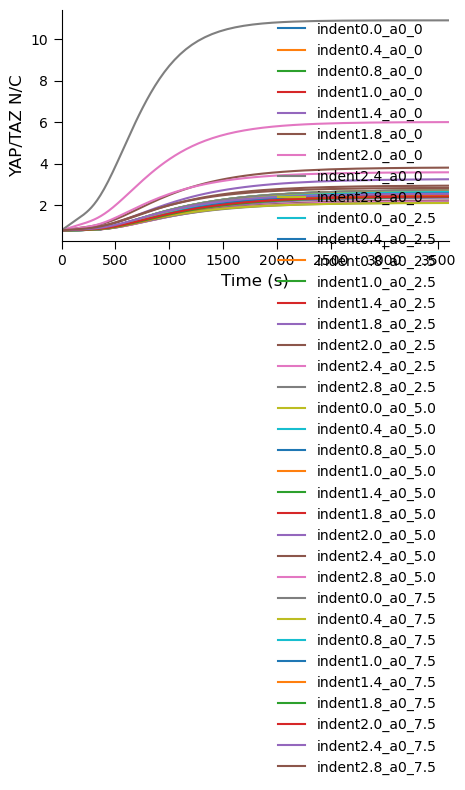

In [10]:
indentationArray = [0.0, 0.4, 0.8, 
                    1.0, 1.4, 1.8, 
                    2.0, 2.4, 2.8]
# indentationArray = [2.4]
a0Array=[0, 2.5, 5.0, 7.5]
var_names_saved = ["Cofilin_NP", "FActin", "GActin", "LaminA", "LIMK_A", "mDia_A", 
                   "Myo_A", "NPC_A", "pFAK", "RhoA_GDP", "RhoA_GTP", "ROCK_A", 
                   "Substrate_A", "YAPTAZ", "YAPTAZ_nuc", "YAPTAZ_phos"]
plot_name = "FActin"
results_idx = var_names_saved.index(plot_name) + 1 # add one because time is first el
plot_names = ["YAPTAZ_phos", "YAPTAZ", "YAPTAZ_nuc"]
results_idx = []
for name in plot_names:
    results_idx.append(var_names_saved.index(name) + 1) # add one because time is first el

fig, ax = plt.subplots()

YAPTAZ_ratios = np.zeros([len(a0Array), len(indentationArray)])

for i in range(len(a0Array)):
    for j in range(len(indentationArray)):
        for domain in ["all"]:
            file_cur = (f"{cur_dir}/analysis_data/npy-files-nanopillars-indent-newdiff"
                    f"/nanopillars_indent{indentationArray[j]}_a0_{a0Array[i]}_results_{domain}.npy")
            try:
                results_cur = np.load(file_cur)
                if a0Array[i] > 0 and indentationArray[j] > 0: # then additional a0 variable included 
                    YAPphos = results_cur[results_idx[0]+1]
                    YAPnp = results_cur[results_idx[1]+1]
                    YAPnuc = results_cur[results_idx[2]+1]
                else:
                    YAPphos = results_cur[results_idx[0]]
                    YAPnp = results_cur[results_idx[1]]
                    YAPnuc = results_cur[results_idx[2]]
                YAPratio = YAPnuc / (YAPphos + YAPnp)
                YAPTAZ_ratios[i][j] = YAPratio[-1]
                if a0Array[i] == 5.0 and indentationArray[j] == 2.8:
                    YAPTAZ_ratio_ref = YAPratio[-1]
                    YAPTAZ_dyn_ref = [results_cur[0], YAPratio]
                    NPC_ref = results_cur[8][-1]
                    phiRef = YAPphos[-1]/(YAPphos[-1] + YAPnp[-1])
                if domain=="center_low":
                    plt.plot(results_cur[0], YAPratio,
                        label=f"indent{indentationArray[j]}_a0_{a0Array[i]} low", linestyle="dashed")
                else:
                    plt.plot(results_cur[0], YAPratio,
                    label=f"indent{indentationArray[j]}_a0_{a0Array[i]}")
            except:
                continue
plt.ylabel("YAP/TAZ N/C")
plt.xlabel('Time (s)')
plt.legend()
plt.xlim([0, 3600])
# plt.savefig("YAPTAZ_withcompression.pdf", format="pdf")

Plot SS YAP/TAZ as a function of indentation for different stretch sensitivities. For the plot shown in Fig 6B, only the moderately stretch sensitive case is plotted.

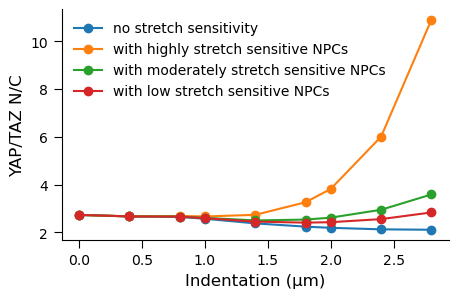

In [11]:
plt.plot(np.array(indentationArray), YAPTAZ_ratios[0], marker="o",label="no stretch sensitivity")
plt.plot(indentationArray, YAPTAZ_ratios[1], marker="o", label="with highly stretch sensitive NPCs")
plt.plot(indentationArray, YAPTAZ_ratios[2], marker="o", label="with moderately stretch sensitive NPCs")
plt.plot(indentationArray, YAPTAZ_ratios[3], marker="o", label="with low stretch sensitive NPCs")
# plt.ylim([2, 3])
# plt.xlim([-.05, 1.55])
plt.xlabel("Indentation (μm)")
plt.ylabel("YAP/TAZ N/C")
plt.legend()
# plt.savefig("indentation_NCsummaryfig6.pdf", format="pdf")

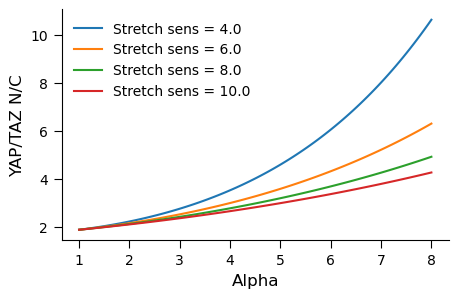

In [12]:
# test quasi well mixed
phiFree = 0.85
NPCdef = 0.3
NPCundef = 0.1
SA0 = 5
SAundef = 40
kinb = 1.0
kin = 10
kout = 1.0
alphaVec = np.linspace(1,8,100)
alpha0Vec = np.linspace(4,10,4)
for i in range(len(alpha0Vec)):
    Yratio = phiFree*((kinb + kin*NPCdef)*SA0*alphaVec*np.exp((alphaVec-1)/alpha0Vec[i]) + (kinb + kin*NPCundef)*SAundef)/(kout*(SA0*alphaVec+SAundef))
    plt.plot(alphaVec, Yratio, label=f"Stretch sens = {alpha0Vec[i]}")
plt.xlabel('Alpha')
plt.ylabel('YAP/TAZ N/C')
plt.legend()
# plt.savefig("stretch_quasiWellMixed.pdf", format="pdf")

Create disk mesh to use for projection of F-actin and Lamin A steady state data.

In [ ]:
rad = 6.0
import gmsh
import numpy as np
import pathlib
from smart import mesh_tools
gmsh.initialize()
gmsh.model.add("arc")
surf = gmsh.model.occ.add_disk(0, 0, 0, rad, rad)
gmsh.model.occ.synchronize()
gmsh.model.add_physical_group(2, [surf], tag=1)
facets = gmsh.model.getBoundary([(2, surf)])
gmsh.model.add_physical_group(1, [facets[0][1]], tag=10)
def meshSizeCallback(dim, tag, x, y, z, lc):
    return 0.15

gmsh.model.mesh.setSizeCallback(meshSizeCallback)
# set off the other options for mesh size determination
gmsh.option.setNumber("Mesh.MeshSizeExtendFromBoundary", 0)
gmsh.option.setNumber("Mesh.MeshSizeFromPoints", 0)
gmsh.option.setNumber("Mesh.MeshSizeFromCurvature", 0)
# this changes the algorithm from Frontal-Delaunay to Delaunay,
# which may provide better results when there are larger gradients in mesh size
gmsh.option.setNumber("Mesh.Algorithm", 5)
gmsh.model.mesh.generate(3)
tmp_folder = pathlib.Path(f"tmp_ellipse")
tmp_folder.mkdir(exist_ok=True)
gmsh_file = tmp_folder / "ellipses.msh"
gmsh.write(str(gmsh_file))
gmsh.finalize()
dmesh, mf1, mf2 = mesh_tools.gmsh_to_dolfin(str(gmsh_file), tmp_folder, 2)
# remove tmp mesh and tmp folder
gmsh_file.unlink(missing_ok=False)
tmp_folder.rmdir()

Compute projection of FActin and LaminA at the z = 2 plane at steady-state. First need to compute the interpolation of 2.8 micron indentation by running interp_meshes.

In [ ]:
import sys
import numpy as np
import dolfin as d
from matplotlib import pyplot as plt
sys.path.append("/root/shared/gitrepos/smart-nanopillars/utils")
from smart_analysis import load_solution
mesh_parent_folder = f"{cur_dir}/meshes"
# results_folder = f"{cur_dir}/analysis_data/simulation_results_2.8indent_interp"
results_folder = "/root/scratch/results_nanopillars_indentation_altDiffusion/nanopillars_indent2.8_a0_5.0_interp"
stress_fiber_int = []
NPC_int = []
idx = 500
for sol in load_solution(mesh_file=f"{mesh_parent_folder}/fullMesh2.8_redo/spreadCell_mesh.h5", 
                            results_file=[f"{results_folder}/FActin_interp.h5", 
                                          f"{results_folder}/LaminA_interp.h5"],
                            idx=idx):
    FActin, LaminA = sol[:]
    dxCyto = d.Measure("dx", FActin.function_space().mesh())
    dxNE = d.Measure("dx", LaminA.function_space().mesh())
    CytoSubmesh = dmesh
    CytoCoordsRef = CytoSubmesh.coordinates()
    VFlat = d.FunctionSpace(CytoSubmesh, "P", 1)
    FActinProj = d.Function(VFlat)
    FActinProjVec = FActinProj.vector().get_local()
    LaminAProj = d.Function(VFlat)
    LaminAProjVec = FActinProj.vector().get_local()
    CytoCoords = VFlat.tabulate_dof_coordinates()
    multFactor = 1/(0.4*0.4*2*0.4*np.pi**(3/2))
    for i in range(len(CytoCoords)):
        curKernel = d.Expression(f"{multFactor}*exp(-(pow(x[0]-({CytoCoords[i,0]}),2) + "
                                 f"pow(x[1]-({CytoCoords[i,1]}),2) + pow((x[2]-2.0)/2,2))/0.16)", 
                                 degree=1)
        FActinProjVec[i] = d.assemble(curKernel*FActin*dxCyto)
        LaminAProjVec[i] = d.assemble(curKernel*LaminA*dxNE)
        print(f"{i+1} of {len(CytoCoords)}")
    FActinProj.vector().set_local(FActinProjVec)
    FActinProj.vector().apply("insert")
    LaminAProj.vector().set_local(LaminAProjVec)
    LaminAProj.vector().apply("insert")
    d.File("FActinProj.pvd") << FActinProj
    d.File("LaminAProj.pvd") << LaminAProj
    break

Plot YAP/TAZ N/C for cases of nuclear rupture (Fig 5E). Must run cases of stretch sensitivity above first to load reference YAP/TAZ data.

(0.0, 3600.0)

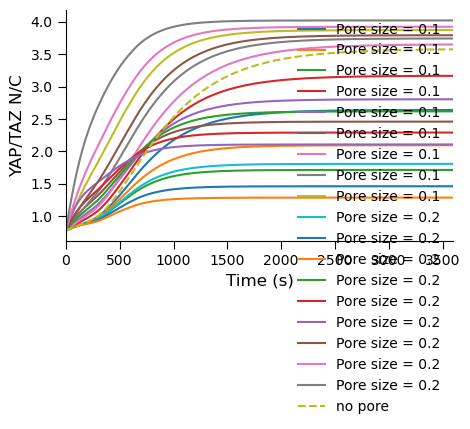

In [13]:
indentation = 2.8
summaryFig = True # set to true for reproducing plot in Fig 6
if summaryFig:
    poreSizeArray = [0.1, 0.2]
    poreRateArray=[1]
    transportRateArray = [10000.0, 30000.0, 100000.0, 10000.0, 30000.0, 100000.0, 10000.0, 30000.0, 100000.0]
    transportRatioArray=[1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 5.0, 5.0, 5.0]
else:
    poreSizeArray=[0.1, 0.2]
    poreRateArray=[1]
    transportRateArray=[100000.0, 100000.0]
    transportRatioArray=[1.0, 5.0]

var_names_saved = ["YAPTAZ", "YAPTAZ_nuc", "YAPTAZ_phos"]
plot_names = ["YAPTAZ_phos", "YAPTAZ", "YAPTAZ_nuc"]
results_idx = []
for name in plot_names:
    results_idx.append(var_names_saved.index(name) + 1) # add one because time is first el
fig, ax = plt.subplots()

pore_dir = f"{cur_dir}/analysis_data/npy-files-nanopillars-rupture-newdiff"
YAPTAZ_ratios = np.zeros([len(poreSizeArray),len(poreRateArray),len(transportRateArray)])
transportRate = np.zeros([len(poreSizeArray),len(poreRateArray),len(transportRateArray)])

for i in range(len(poreSizeArray)):
    for j in range(len(poreRateArray)):
        for k in range(len(transportRateArray)):
            cur_file = (f"nanopillars_indent{indentation}_pore_size{poreSizeArray[i]}_"
                    f"loc0.0_rate{poreRateArray[j]}_transport{transportRateArray[k]}_"
                    f"ratio{transportRatioArray[k]}_results_all.npy")
            cur_file = f"{pore_dir}/{cur_file}"
            try:
                results_cur = np.load(cur_file)
            except:
                continue
            if results_cur[0][-1] < 1e5:
                print("short")
            YAPphos = results_cur[results_idx[0]]
            YAPnp = results_cur[results_idx[1]]
            YAPnuc = results_cur[results_idx[2]]
            # YAPphos_nuc = results_cur[results_idx[3]]
            YAPratio = (YAPnuc) / (YAPphos + YAPnp)
            plt.plot(results_cur[0], YAPratio, label=f"Pore size = {poreSizeArray[i]}")
            YAPTAZ_ratios[i][j][k] = YAPratio[-1]
            transportRate[i][j][k] = transportRateArray[k]*np.pi*poreSizeArray[i]**2
plt.plot(YAPTAZ_dyn_ref[0], YAPTAZ_dyn_ref[1], linestyle="dashed", label="no pore")
plt.legend()
plt.ylabel("YAP/TAZ N/C")
plt.xlabel('Time (s)')
plt.xlim([0, 3600])
# plt.savefig("fig5dynamics.pdf", format="pdf")

Create summary plot for Fig 6 (relationship between rupture rate and YAP/TAZ N/C). Must run the above cell with `summaryFig = True` first.

Text(0, 0.5, 'YAP/TAZ N/C')

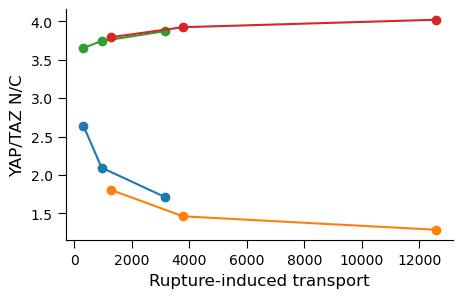

In [14]:
rates1 = transportRate[:,:,[0,1,2]].reshape(1,-1)[0]
ratios1 = YAPTAZ_ratios[:,:,[0,1,2]].reshape(1,-1)[0]
idx1 = np.argsort(rates1)
rates3 = transportRate[:,:,[6,7,8]].reshape(1,-1)[0]
ratios3 = YAPTAZ_ratios[:,:,[6,7,8]].reshape(1,-1)[0]
idx3 = np.argsort(rates3)
# plt.plot(rates1[idx1[[0,1,2,3,4,5]]], ratios1[idx1[[0,1,2,3,4,5]]], 'o', label="Entry/exit ratio = 1")
# plt.plot(transportRate[:,:,[3,4,5]].reshape(1,-1)[0], YAPTAZ_ratios[:,:,[3,4,5]].reshape(1,-1)[0], 'o-')
# plt.plot(rates3[idx3[[0,1,2,3,4,5]]], ratios3[idx3[[0,1,2,3,4,5]]], 'o', label="Entry/exit ratio = 5")
plt.plot(rates1[[0,1,2]], ratios1[[0,1,2]], 'o-', label="v = 1, pore rad = 0.1")
plt.plot(rates1[[3,4,5]], ratios1[[3,4,5]], 'o-', label="v = 1, pore rad = 0.2")
plt.plot(rates3[[0,1,2]], ratios3[[0,1,2]], 'o-', label="v = 5, pore rad = 0.1")
plt.plot(rates3[[3,4,5]], ratios3[[3,4,5]], 'o-', label="v = 5, pore rad = 0.2")
plt.xlabel('Rupture-induced transport')
plt.ylabel('YAP/TAZ N/C')
# plt.savefig("rupture_Fig6.pdf", format="pdf")

Plot quasi well mixed assumption for case of NER (Fig S3C).

In [ ]:
# test quasi well mixed
phiFree = 0.85
NPCdef = 0.3
NPCundef = 0.1
SA0 = 5
SAundef = 40
kinb = 1.0
kin = 10
kout = 1.0
SApore = np.pi*0.2**2
krupture = 10000
kruptureVec = krupture*np.linspace(0,10,100)
upsilonVec = np.linspace(1,6,6)
alpha0 = 5.0
alpha = 4.5
for i in range(len(upsilonVec)):
    Yratio = phiFree*((kinb + kin*NPCdef)*SA0*alpha*np.exp((alpha-1)/alpha0) + (kinb + kin*NPCundef)*SAundef + kruptureVec*SApore)/(kout*(SA0*alpha+SAundef) + (kruptureVec/upsilonVec[i])*SApore)
    plt.plot(kruptureVec, Yratio, label=f"Ratio = {upsilonVec[i]}")
plt.xlabel('Rupture-induced transport')
plt.ylabel('YAP/TAZ N/C')
plt.legend()
# plt.savefig("rupture_quasiWellMixed.pdf", format="pdf")

Write spatiotemporal dynamics of pore formation to file. Currently runs on the full mesh generated after running `interp_meshes`, but can also run on other meshes (change path to mesh accordingly).

In [ ]:
import dolfin as d
from smart import mesh_tools
import pathlib
import numpy as np
loaded = mesh_tools.load_mesh(pathlib.Path(f"{cur_dir}/meshes/fullMesh2.8") / "spreadCell_mesh.h5")
mesh_cur = d.create_meshview(loaded.mf_facet, 12)
Vcur = d.FunctionSpace(mesh_cur, "P", 1)
xShift = 0.0
centerLogic = np.logical_and(np.isclose(mesh_cur.coordinates()[:,0], xShift, 0.1),
               np.logical_and(
               np.isclose(mesh_cur.coordinates()[:,1], 0.),
               mesh_cur.coordinates()[:,2] < 0.8*np.max(mesh_cur.coordinates()[:,2])))
centerIdx = np.nonzero(centerLogic)[0]
centerIdx = centerIdx[np.argmin(np.abs(mesh_cur.coordinates()[centerIdx,0]-xShift))]
zCenter = mesh_cur.coordinates()[centerIdx,2]
tVals = np.linspace(0., 5., 200)
pore_xdmf = d.XDMFFile(d.MPI.comm_world, "pore.xdmf")
pore_xdmf.parameters["flush_output"] = True
t = d.Constant(tVals[0])
poreRad = 0.1
pore_expr = d.Expression(f"(1-exp(-tCur/1.0))*exp(-(pow(x[0]-{xShift},2)+pow(x[1],2)+pow(x[2]-{zCenter},2))/(pow(poreRad,2)))", tCur = t, degree=1, poreRad=poreRad)
pore_fcn = d.interpolate(pore_expr, Vcur)
for i in range(len(tVals)):
    t.assign(tVals[i])
    pore_fcn = d.interpolate(pore_expr, Vcur)
    pore_fcn.rename("pore", "pore")
    pore_xdmf.write(pore_fcn, tVals[i])